### 라이브러리 로딩

In [ ]:
# 라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import logging
import os

# 로깅 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


### 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 출력 디렉토리 생성
output_dir = './output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    logging.info(f"출력 디렉토리 생성: {output_dir}")

In [3]:
# 데이터 로드
file_path = './src/ProcessedResumeDataSet.csv'
df = pd.read_csv(file_path)
logging.info(f"데이터 로드 완료: {df.shape}")

2025-05-09 09:33:53,429 - INFO - 데이터 로드 완료: (962, 6)


In [4]:
# 데이터 품질 점검
empty_skills = df['skills'].apply(lambda x: len(eval(x)) == 0).sum()
empty_education = df['education'].apply(lambda x: len(eval(x)) == 0).sum()
empty_experience = df['experience'].apply(lambda x: len(eval(x)) == 0).sum()
logging.info(f"빈 skills 레코드: {empty_skills}/{len(df)}")
logging.info(f"빈 education 레코드: {empty_education}/{len(df)}")
logging.info(f"빈 experience 레코드: {empty_experience}/{len(df)}")

2025-05-09 09:33:53,464 - INFO - 빈 skills 레코드: 54/962
2025-05-09 09:33:53,465 - INFO - 빈 education 레코드: 427/962
2025-05-09 09:33:53,465 - INFO - 빈 experience 레코드: 34/962


### 1. 카테고리 분포 시각화

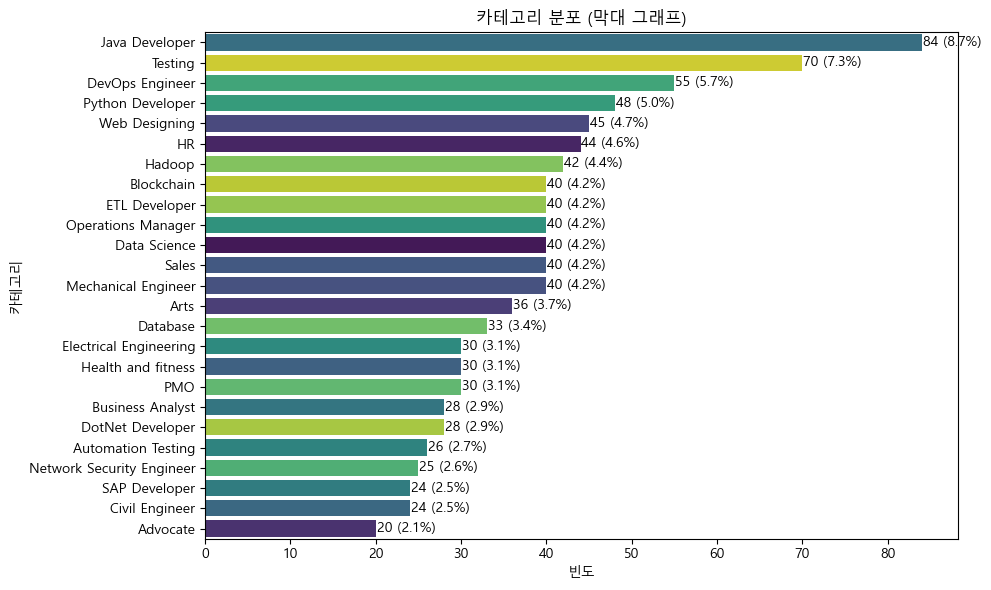

2025-05-09 09:33:53,828 - INFO - 카테고리 분포 막대 그래프 저장: category_distribution_bar.png


In [ ]:
# 1. 카테고리 분포 (막대 그래프)
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts()
sns.countplot(y='Category', data=df, order=category_counts.index, hue='Category', legend=False, palette='viridis')
for i, count in enumerate(category_counts):
    percentage = 100 * count / len(df)
    plt.text(count + 0.1, i, f'{count} ({percentage:.1f}%)', va='center')
plt.title('카테고리 분포 (막대 그래프)')
plt.xlabel('빈도')
plt.ylabel('카테고리')
plt.tight_layout()
plt.savefig(f'{output_dir}/category_distribution_bar.png')
plt.show()
plt.close()
logging.info("카테고리 분포 막대 그래프 저장: category_distribution_bar.png")

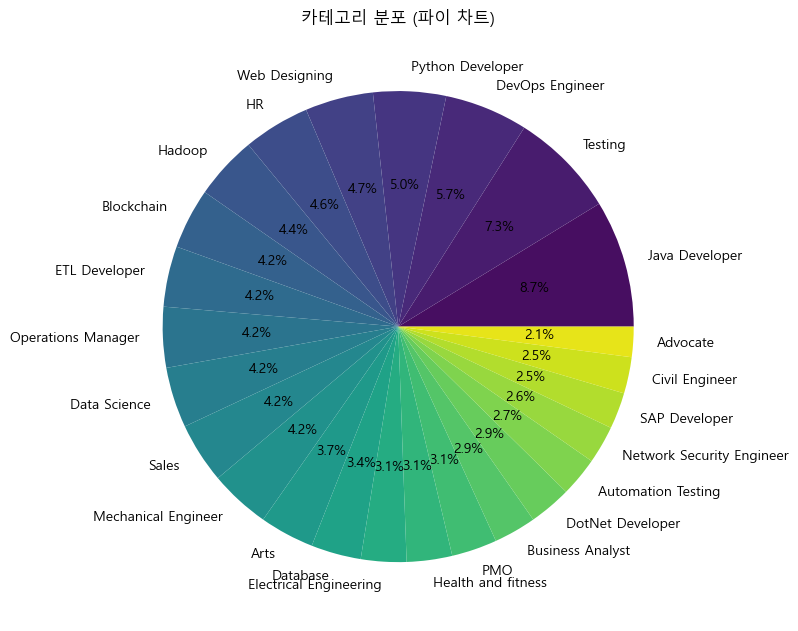

2025-05-09 09:33:54,059 - INFO - 카테고리 분포 파이 차트 저장: category_distribution_pie.png


In [ ]:
# 2. 카테고리 분포 (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('카테고리 분포 (파이 차트)')
plt.tight_layout()
plt.savefig(f'{output_dir}/category_distribution_pie.png')
plt.show()
plt.close()
logging.info("카테고리 분포 파이 차트 저장: category_distribution_pie.png")

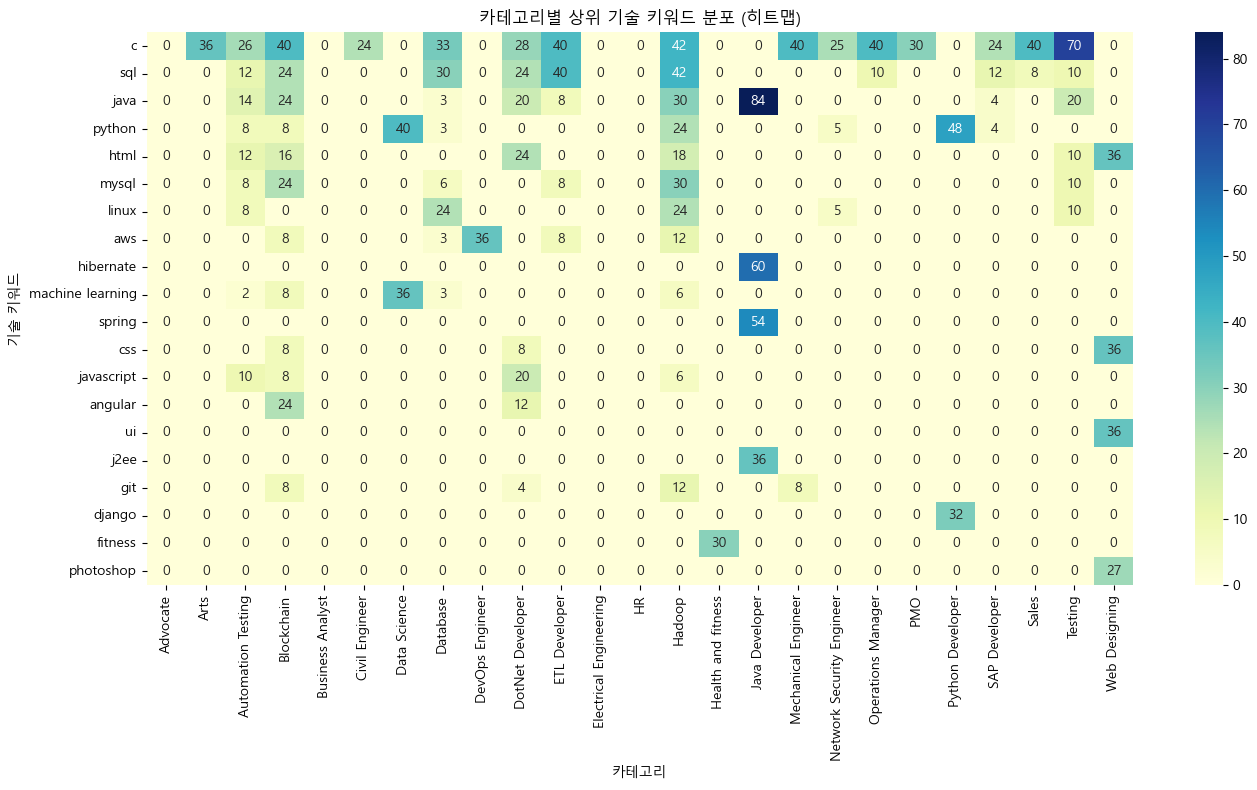

2025-05-09 09:33:54,958 - INFO - 기술 키워드 히트맵 저장: skills_heatmap.png


In [ ]:
# 3. 기술 키워드 히트맵 (상위 20개 기술)
mlb = MultiLabelBinarizer()
skill_matrix = mlb.fit_transform(df['skills'].apply(eval))
skills_df = pd.DataFrame(skill_matrix, columns=mlb.classes_)
skills_df['Category'] = df['Category']
pivot_df = skills_df.groupby('Category').sum()
skill_sums = pivot_df.sum().sort_values(ascending=False)
top_skills = skill_sums.head(20).index
pivot_df_top = pivot_df[top_skills]
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df_top.T, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('카테고리별 상위 기술 키워드 분포 (히트맵)')
plt.xlabel('카테고리')
plt.ylabel('기술 키워드')
plt.tight_layout()
plt.savefig(f'{output_dir}/skills_heatmap.png')
plt.show()
plt.close()
logging.info("기술 키워드 히트맵 저장: skills_heatmap.png")

### 2. 기술 키워드 빈도 분석

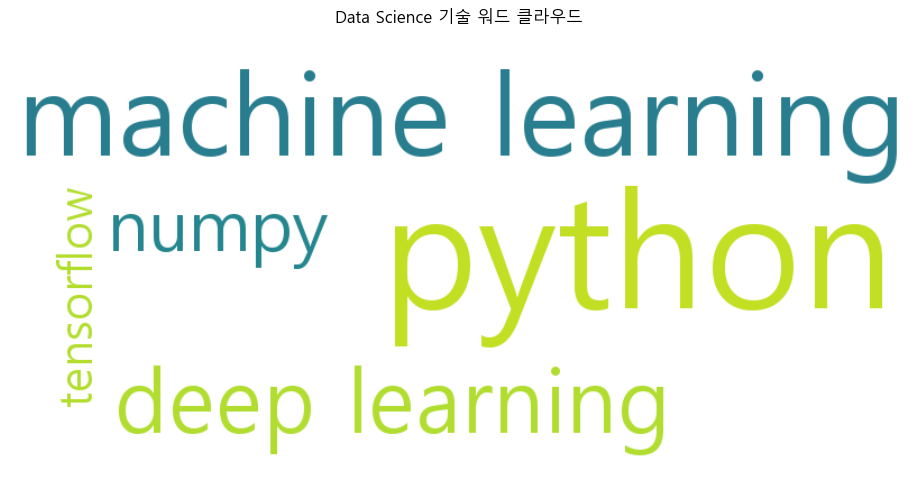

2025-05-09 09:33:55,301 - INFO - Data Science 기술 워드 클라우드 저장: skills_wordcloud_data_science.png


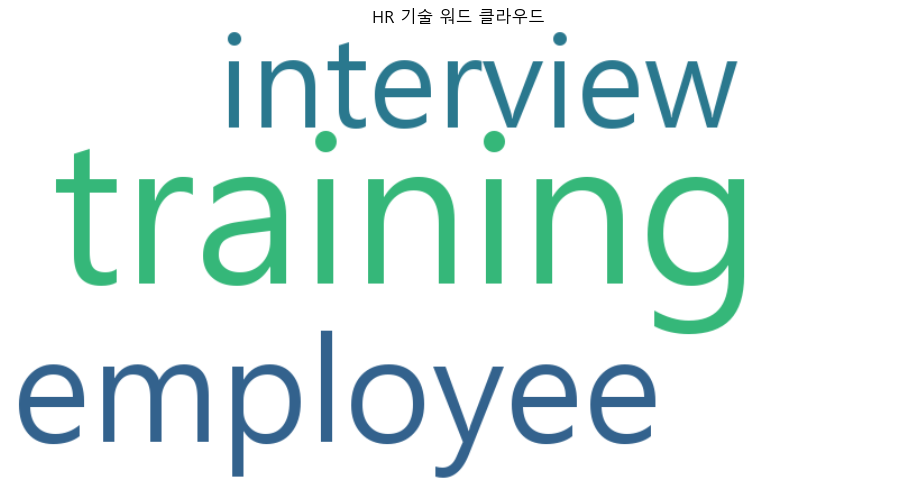

2025-05-09 09:33:55,538 - INFO - HR 기술 워드 클라우드 저장: skills_wordcloud_hr.png


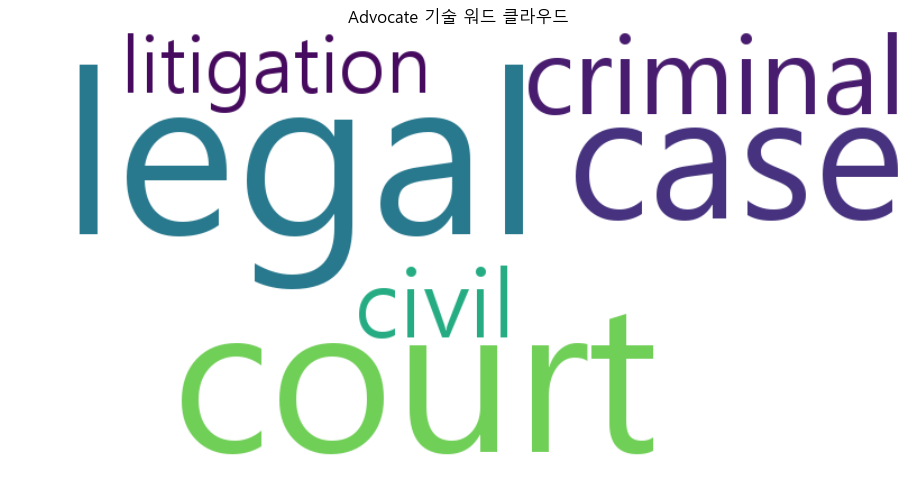

2025-05-09 09:33:55,793 - INFO - Advocate 기술 워드 클라우드 저장: skills_wordcloud_advocate.png


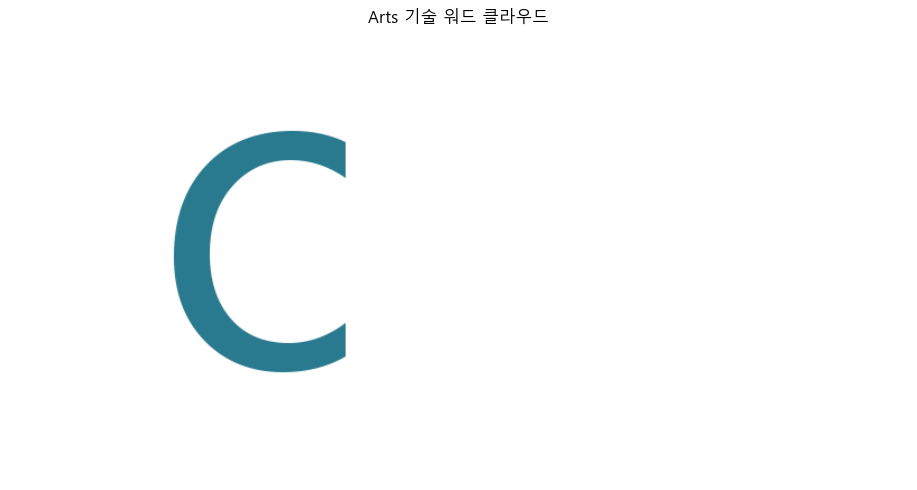

2025-05-09 09:33:55,942 - INFO - Arts 기술 워드 클라우드 저장: skills_wordcloud_arts.png


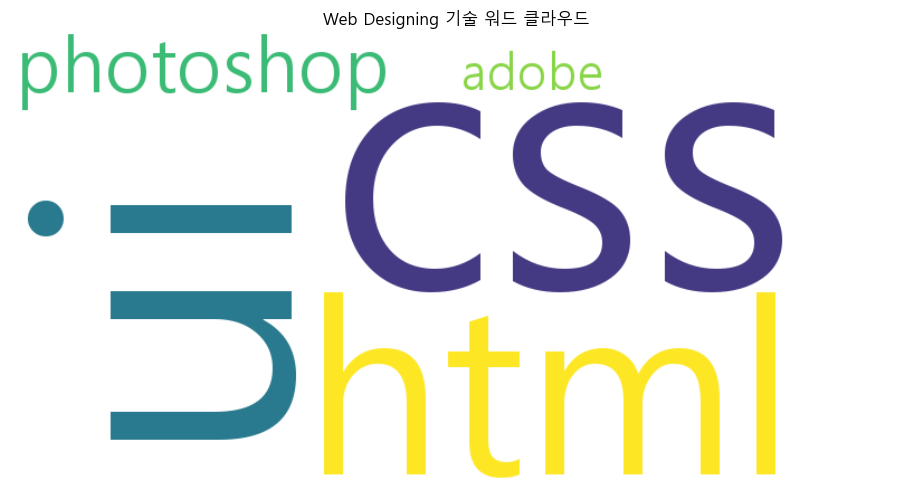

2025-05-09 09:33:56,210 - INFO - Web Designing 기술 워드 클라우드 저장: skills_wordcloud_web_designing.png


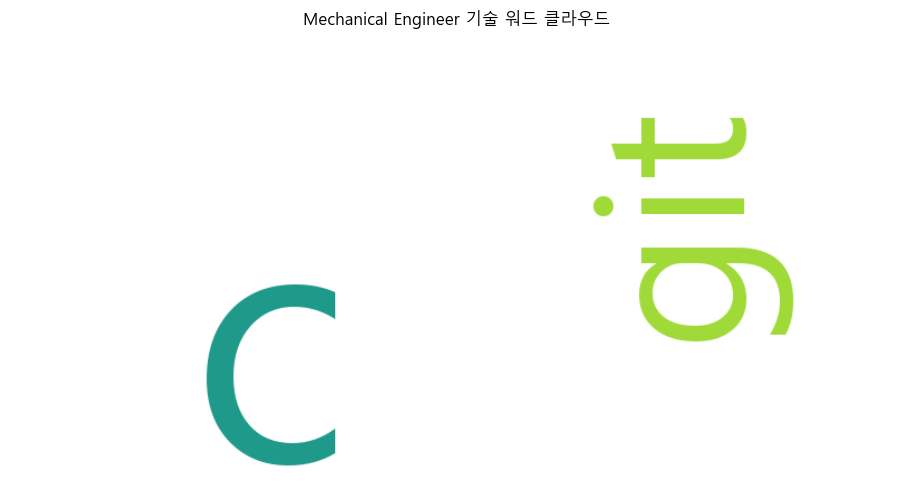

2025-05-09 09:33:56,384 - INFO - Mechanical Engineer 기술 워드 클라우드 저장: skills_wordcloud_mechanical_engineer.png


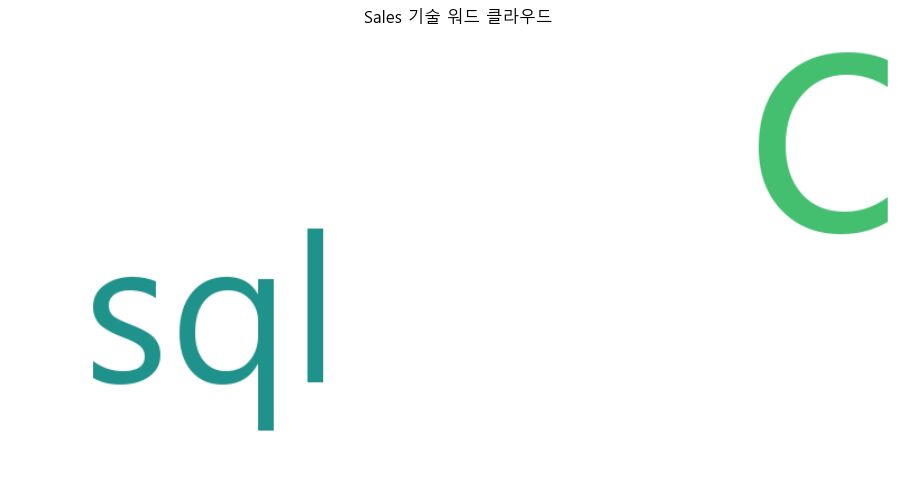

2025-05-09 09:33:56,555 - INFO - Sales 기술 워드 클라우드 저장: skills_wordcloud_sales.png


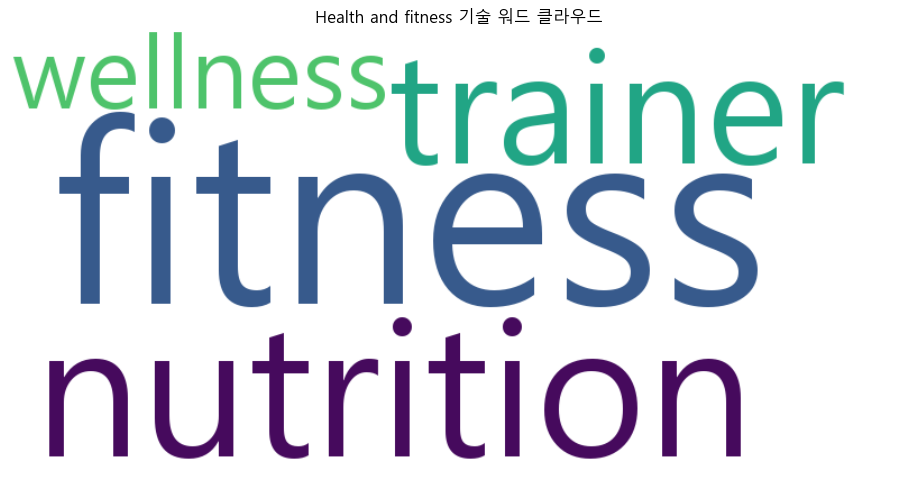

2025-05-09 09:33:56,770 - INFO - Health and fitness 기술 워드 클라우드 저장: skills_wordcloud_health_and_fitness.png


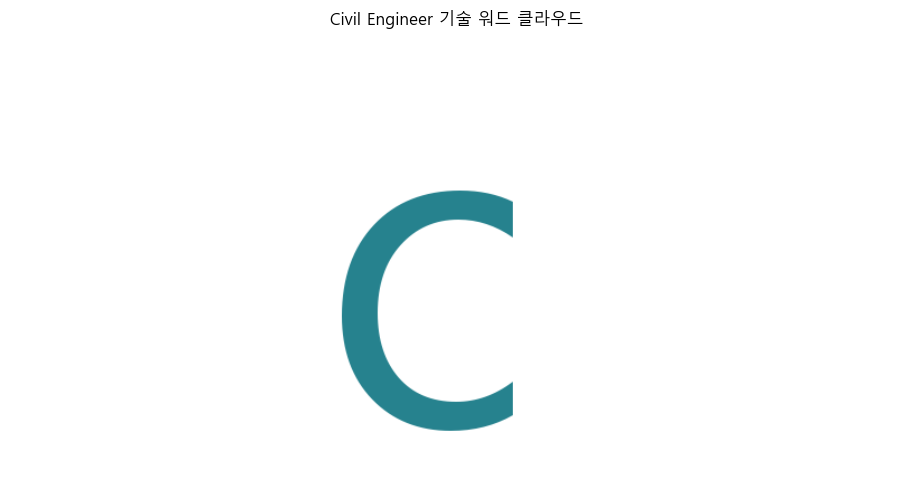

2025-05-09 09:33:56,923 - INFO - Civil Engineer 기술 워드 클라우드 저장: skills_wordcloud_civil_engineer.png


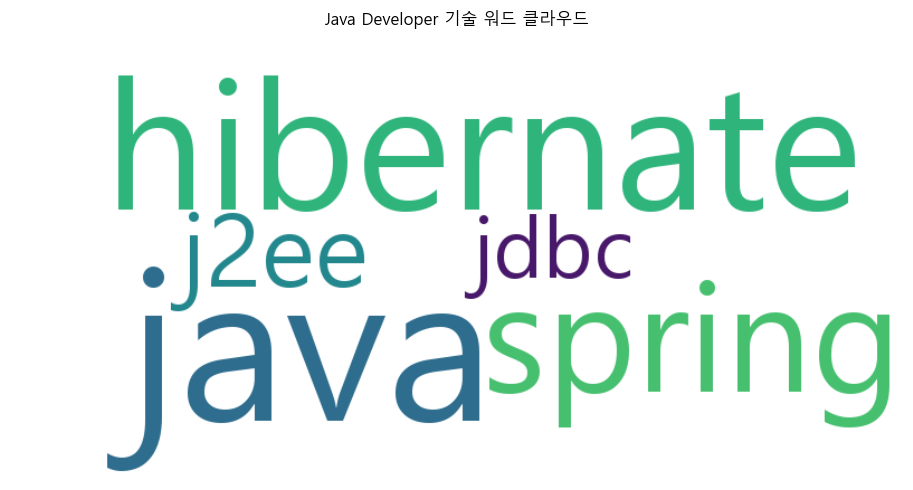

2025-05-09 09:33:57,161 - INFO - Java Developer 기술 워드 클라우드 저장: skills_wordcloud_java_developer.png


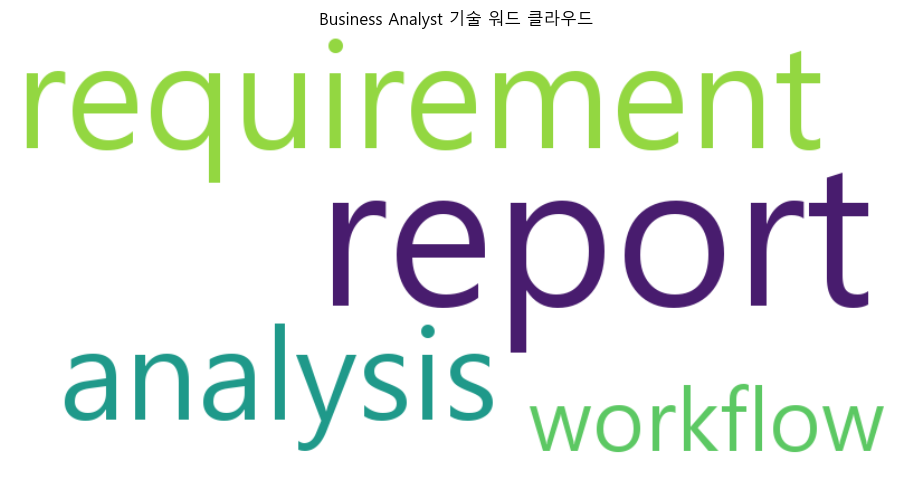

2025-05-09 09:33:57,417 - INFO - Business Analyst 기술 워드 클라우드 저장: skills_wordcloud_business_analyst.png


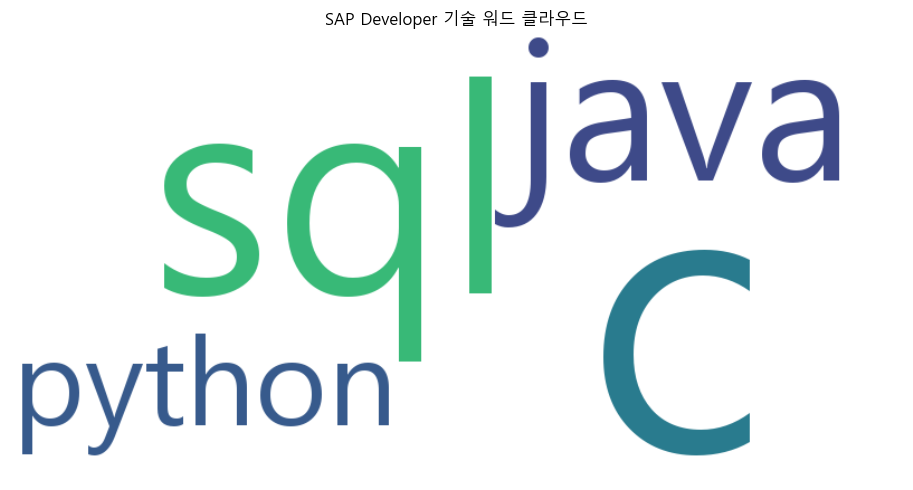

2025-05-09 09:33:57,601 - INFO - SAP Developer 기술 워드 클라우드 저장: skills_wordcloud_sap_developer.png


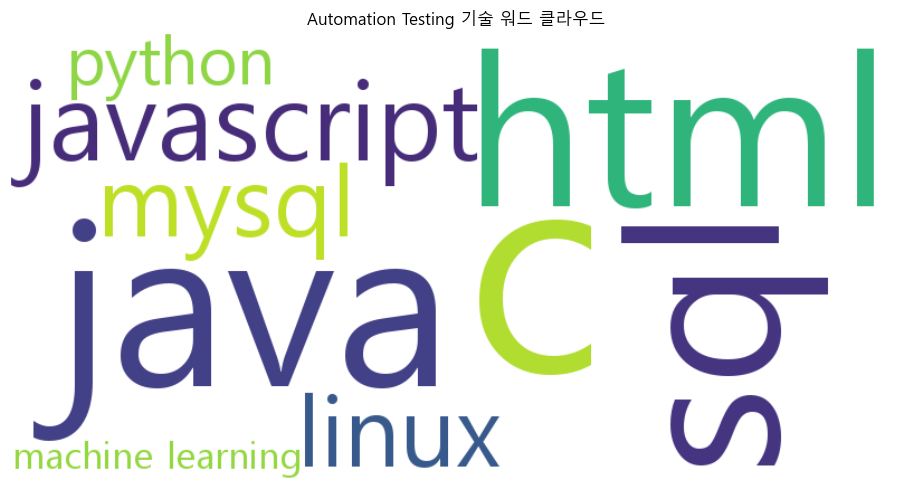

2025-05-09 09:33:57,877 - INFO - Automation Testing 기술 워드 클라우드 저장: skills_wordcloud_automation_testing.png


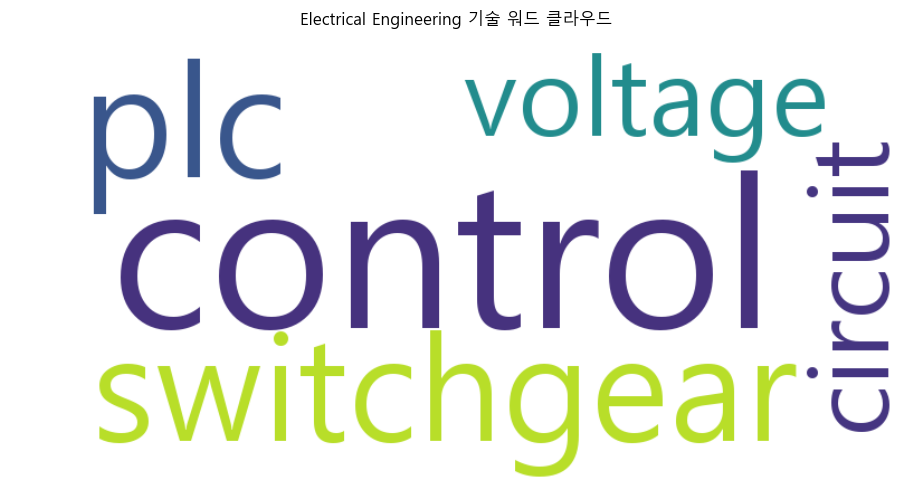

2025-05-09 09:33:58,131 - INFO - Electrical Engineering 기술 워드 클라우드 저장: skills_wordcloud_electrical_engineering.png


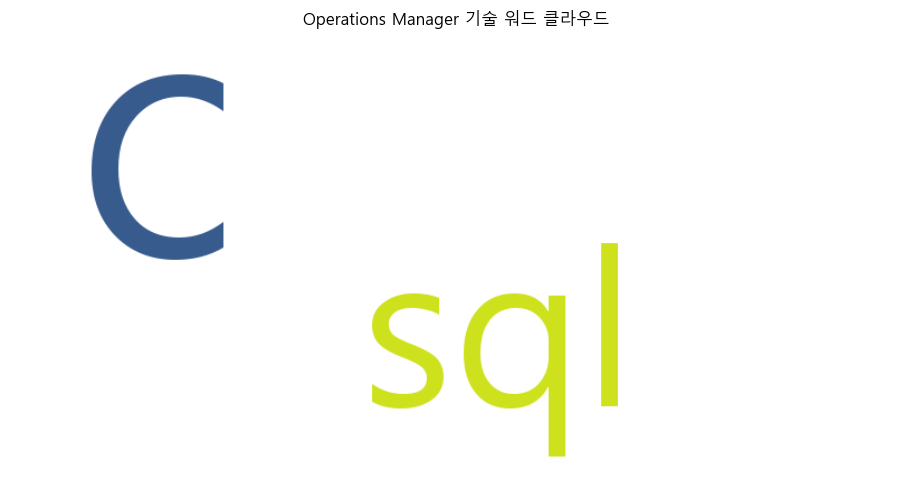

2025-05-09 09:33:58,297 - INFO - Operations Manager 기술 워드 클라우드 저장: skills_wordcloud_operations_manager.png


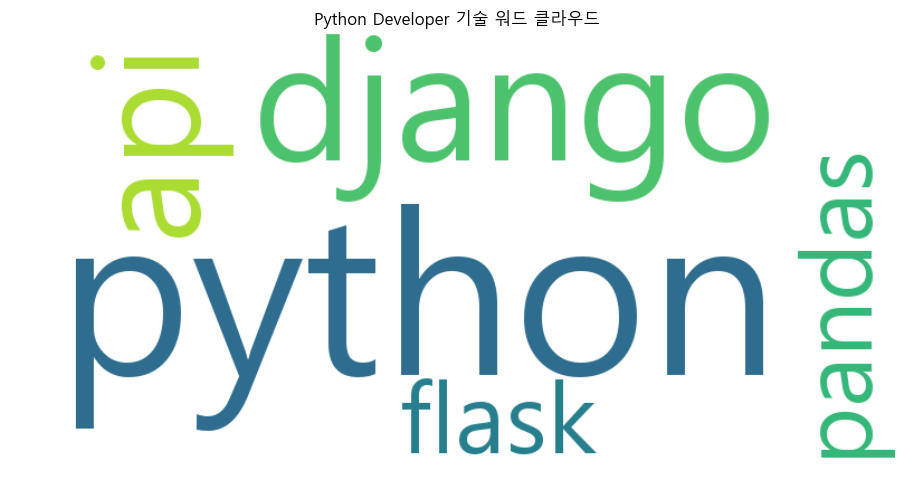

2025-05-09 09:33:58,542 - INFO - Python Developer 기술 워드 클라우드 저장: skills_wordcloud_python_developer.png


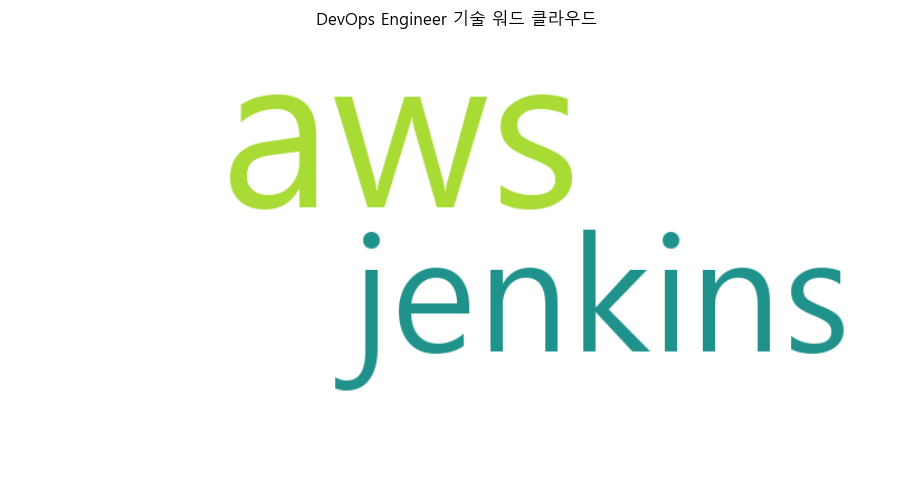

2025-05-09 09:33:58,768 - INFO - DevOps Engineer 기술 워드 클라우드 저장: skills_wordcloud_devops_engineer.png


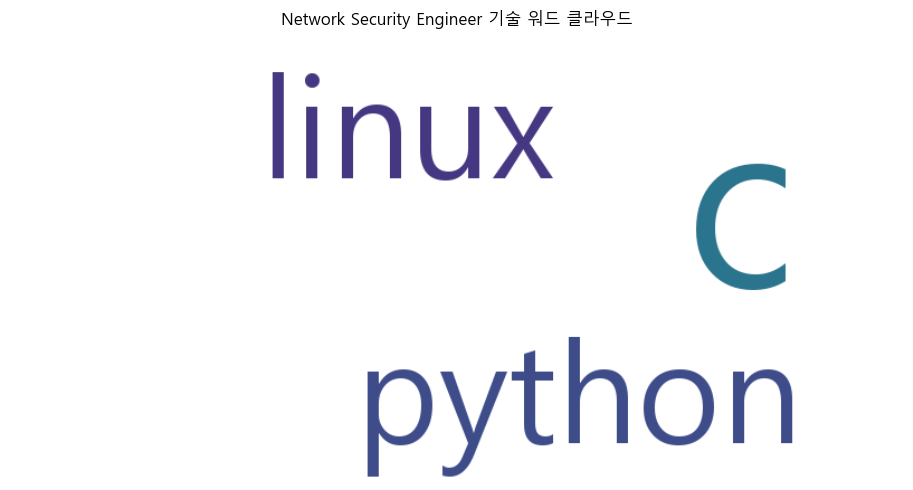

2025-05-09 09:33:58,968 - INFO - Network Security Engineer 기술 워드 클라우드 저장: skills_wordcloud_network_security_engineer.png


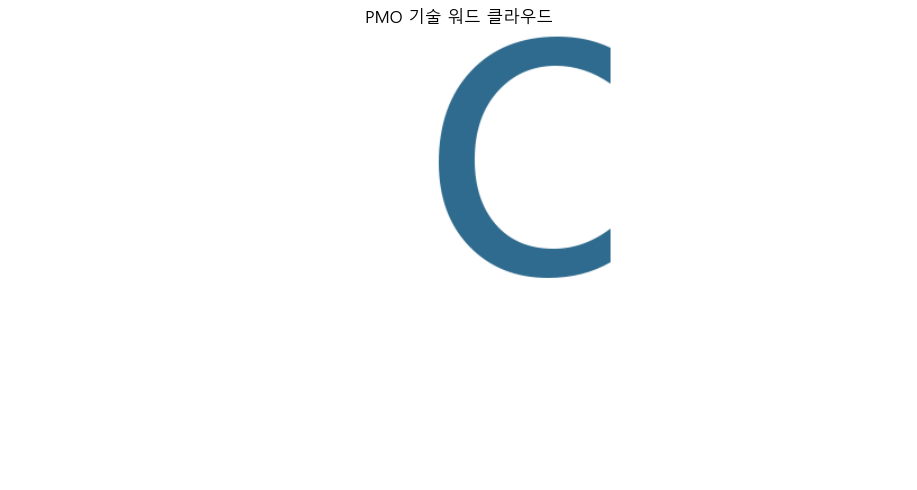

2025-05-09 09:33:59,141 - INFO - PMO 기술 워드 클라우드 저장: skills_wordcloud_pmo.png


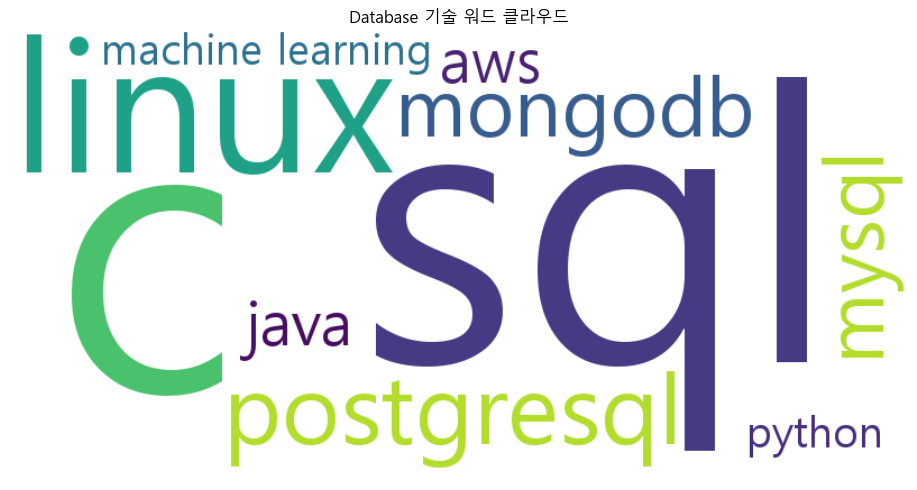

2025-05-09 09:33:59,417 - INFO - Database 기술 워드 클라우드 저장: skills_wordcloud_database.png


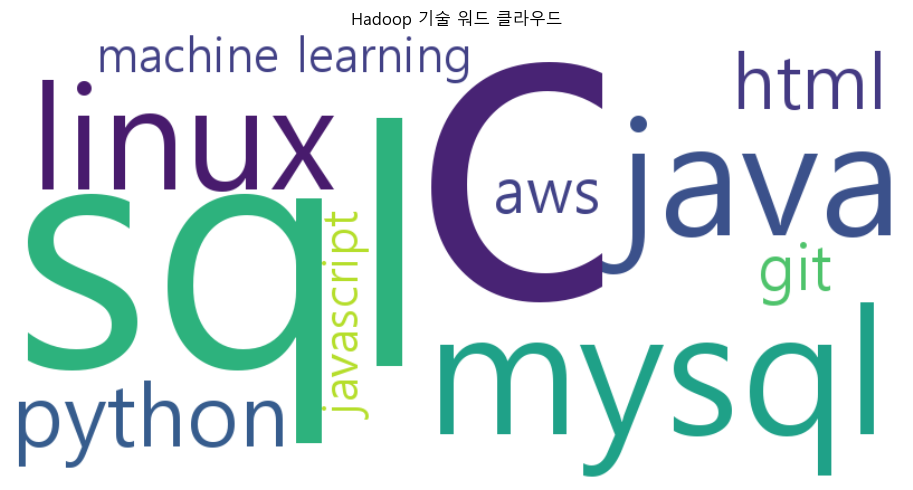

2025-05-09 09:33:59,691 - INFO - Hadoop 기술 워드 클라우드 저장: skills_wordcloud_hadoop.png


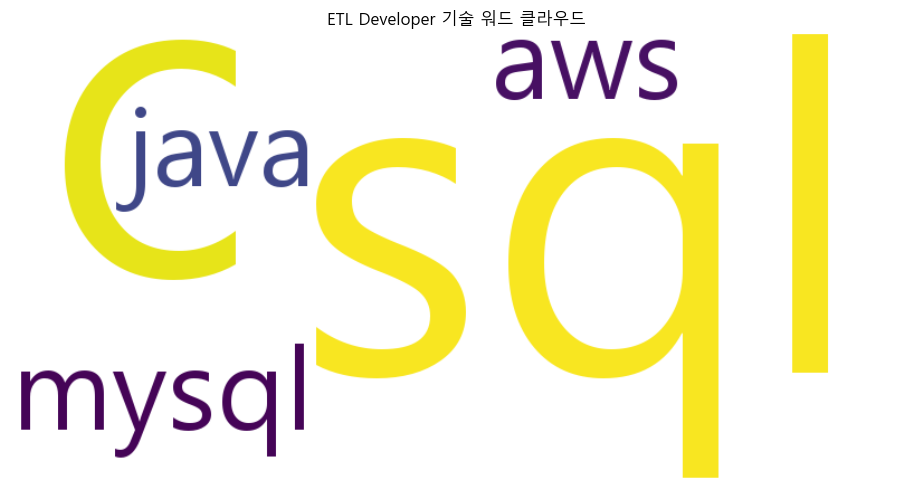

2025-05-09 09:33:59,915 - INFO - ETL Developer 기술 워드 클라우드 저장: skills_wordcloud_etl_developer.png


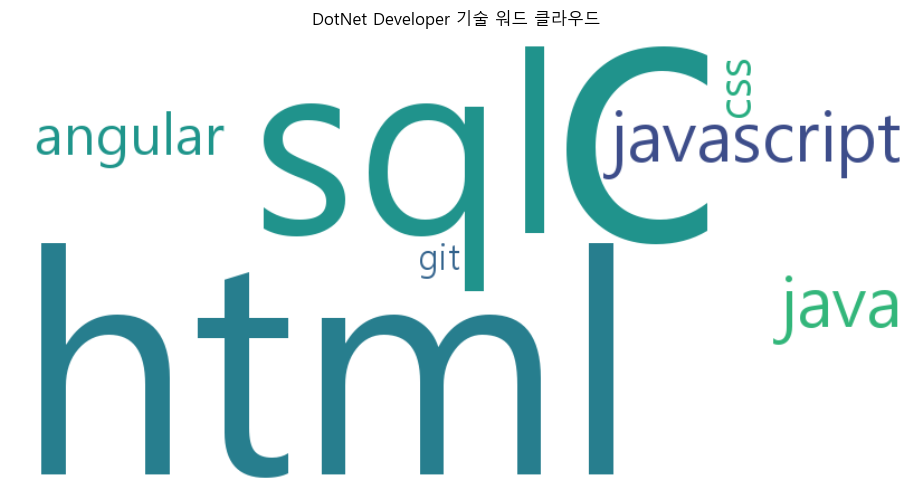

2025-05-09 09:34:00,192 - INFO - DotNet Developer 기술 워드 클라우드 저장: skills_wordcloud_dotnet_developer.png


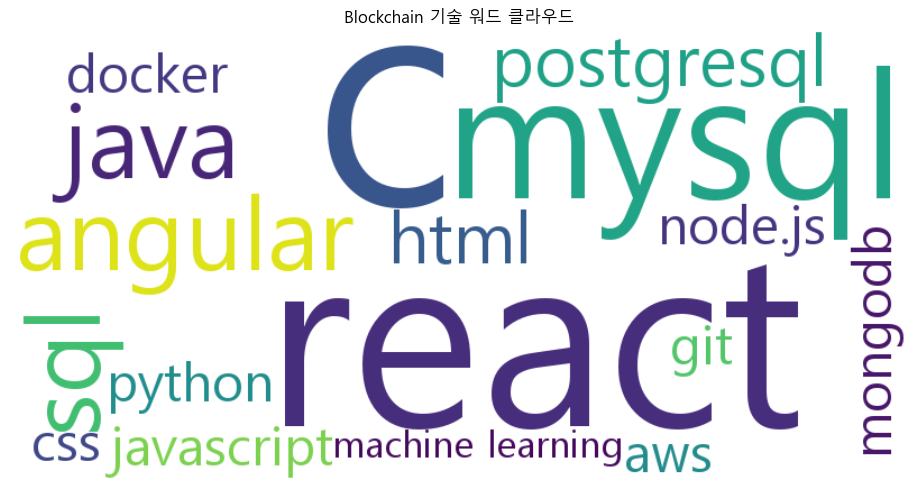

2025-05-09 09:34:00,473 - INFO - Blockchain 기술 워드 클라우드 저장: skills_wordcloud_blockchain.png


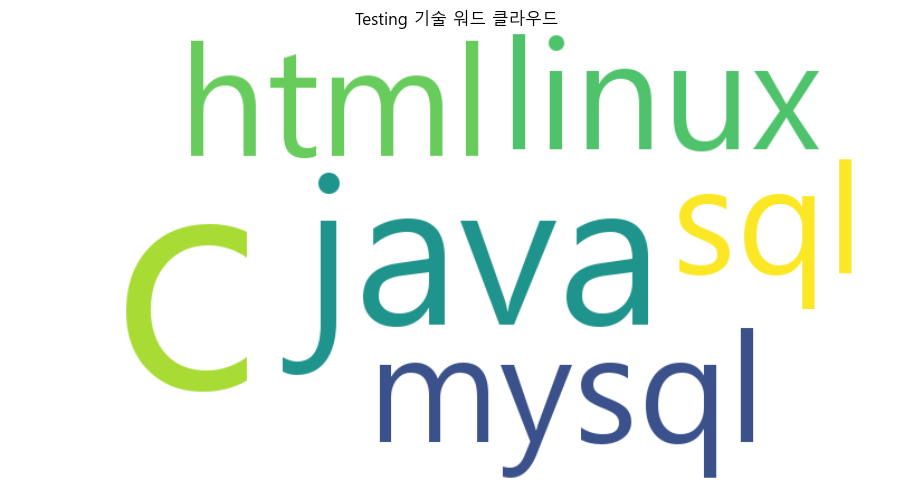

2025-05-09 09:34:00,670 - INFO - Testing 기술 워드 클라우드 저장: skills_wordcloud_testing.png


In [ ]:
# 4. 기술 키워드 워드 클라우드 (카테고리별)
for category in df['Category'].unique():
    category_skills = []
    for skills in df[df['Category'] == category]['skills'].apply(eval):
        category_skills.extend(skills)
    skill_counts = Counter(category_skills)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(skill_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{category} 기술 워드 클라우드')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/skills_wordcloud_{category.lower().replace(" ", "_")}.png')
    plt.show()
    plt.close()
    logging.info(f"{category} 기술 워드 클라우드 저장: skills_wordcloud_{category.lower().replace(' ', '_')}.png")

2025-05-09 09:38:25,505 - INFO - 학위 데이터: {'count': {'Diploma': 218, 'Bachelor': 199, 'B.E.': 109, 'Master': 52, 'B.Tech': 24, 'MCA': 18, 'diploma': 18, 'DIPLOMA': 18, 'M.Tech': 14, 'master': 13, 'BACHELOR': 10, 'MASTER': 10, 'M.tech': 4}}
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18720\489636438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='count', y=degree_df.index, palette='Blues_d')


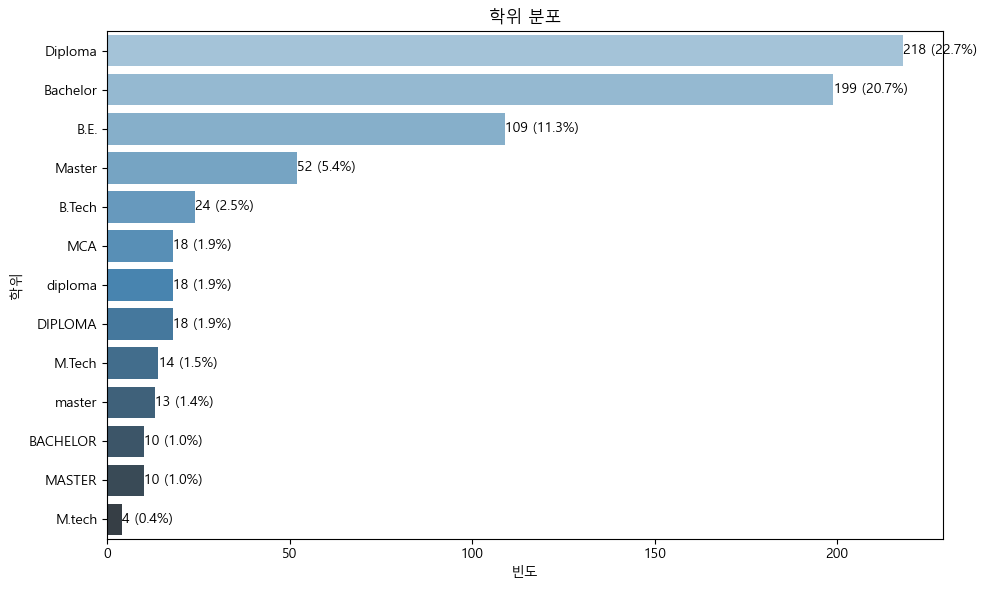

2025-05-09 09:38:25,780 - INFO - 학위 분포 저장: degree_distribution.png


In [10]:
# 5. 학위 분포 (education에서 degree 추출)
degrees = []
for edu in df['education'].apply(eval):
    degrees.extend(edu)
degree_counts = Counter(degrees)
if degree_counts:
    degree_df = pd.DataFrame.from_dict(degree_counts, orient='index', columns=['count']).sort_values('count', ascending=False)
    logging.info(f"학위 데이터: {degree_df.to_dict()}")
    plt.figure(figsize=(10, 6))
    sns.barplot(data=degree_df, x='count', y=degree_df.index, palette='Blues_d')
    for i, count in enumerate(degree_df['count']):
        percentage = 100 * count / len(df)
        plt.text(count + 0.1, i, f'{count} ({percentage:.1f}%)', va='center')
    plt.title('학위 분포')
    plt.xlabel('빈도')
    plt.ylabel('학위')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/degree_distribution.png')
    plt.show()
    plt.close()
    logging.info("학위 분포 저장: degree_distribution.png")
else:
    logging.warning("학위 데이터가 없어 학위 분포 시각화를 생성하지 않음")

### 3. 워드클라우드 생성 (전체 cleaned_resume 기준)

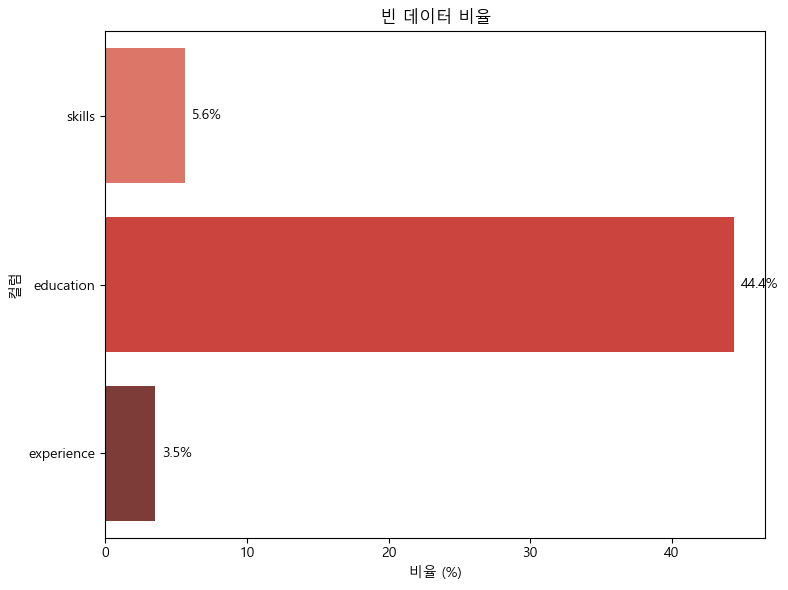

2025-05-09 09:38:56,303 - INFO - 빈 데이터 비율 저장: empty_data_ratio.png


In [11]:
# 6. 빈 데이터 비율 (skills, education, experience)
empty_data = {
    'skills': empty_skills / len(df) * 100,
    'education': empty_education / len(df) * 100,
    'experience': empty_experience / len(df) * 100
}
plt.figure(figsize=(8, 6))
sns.barplot(x=empty_data.values(), y=list(empty_data.keys()), hue=list(empty_data.keys()), legend=False, palette='Reds_d')
for i, percentage in enumerate(empty_data.values()):
    plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')
plt.title('빈 데이터 비율')
plt.xlabel('비율 (%)')
plt.ylabel('컬럼')
plt.tight_layout()
plt.savefig(f'{output_dir}/empty_data_ratio.png')
plt.show()
plt.close()
logging.info("빈 데이터 비율 저장: empty_data_ratio.png")

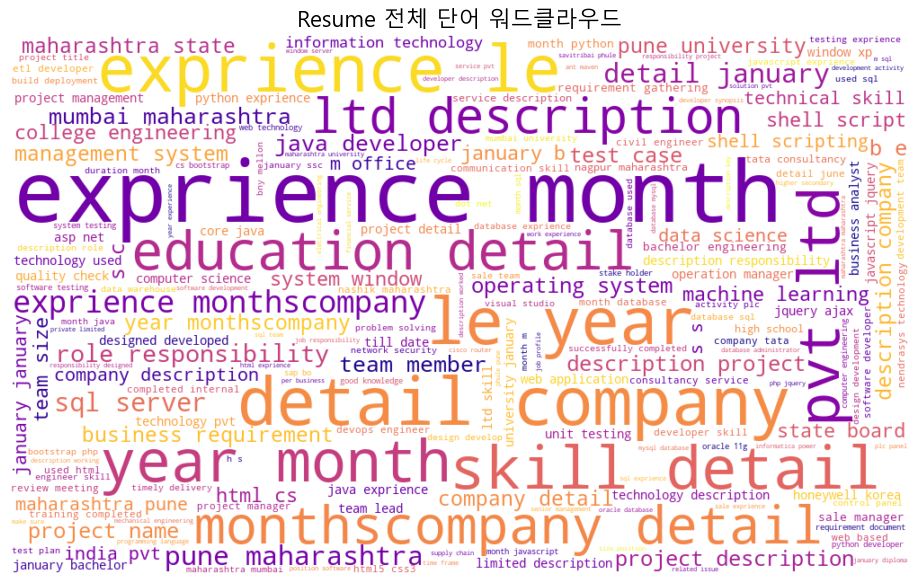

In [ ]:
text_corpus = ' '.join(df['cleaned_resume'].dropna())

wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='plasma', max_words=200).generate(text_corpus)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Resume 전체 단어 워드클라우드", fontsize=16)
plt.show()